# Data Manipulation and Visualization

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Information  

In [ ]:
full_name = 'Ali Aramideh'

In [ ]:
# Import all your libraries here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder

## Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this question you will again perform data wrangling and interpretation.

### 1. Loading phase
Load the json file into a `DataFrame`.


In [ ]:
df_bike = pd.read_json('data/bikes/metro-bike-share-trip-data.json')
df_bike

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:43:00,3055.0,34.044159,-118.251579,23660993,One Way
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:44:00,3055.0,34.044159,-118.251579,23660992,One Way
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:44:00,3082.0,34.046520,-118.237411,23660991,One Way
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:45:00,3082.0,34.046520,-118.237411,23660990,One Way


### 2. Cleaning phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  

2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

#### 1. Describe the type and the value range of each attribute.  


In [ ]:
# 1
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Bike ID                     132417 non-null  float64
 1   Duration                    132427 non-null  int64  
 2   End Time                    132427 non-null  object 
 3   Ending Station ID           132331 non-null  float64
 4   Ending Station Latitude     131376 non-null  float64
 5   Ending Station Longitude    131376 non-null  float64
 6   Passholder Type             132427 non-null  object 
 7   Plan Duration               131661 non-null  float64
 8   Start Time                  132427 non-null  object 
 9   Starting Station ID         132408 non-null  float64
 10  Starting Station Latitude   132379 non-null  float64
 11  Starting Station Longitude  132379 non-null  float64
 12  Trip ID                     132427 non-null  int64  
 13  Trip Route Cat

So this dataset has null values

In [ ]:
print(df_bike.isnull().sum())
print('##-----------------------------------')
print(df_bike.isna().sum())

Bike ID                         10
Duration                         0
End Time                         0
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
Passholder Type                  0
Plan Duration                  766
Start Time                       0
Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Trip ID                          0
Trip Route Category              0
dtype: int64
##-----------------------------------
Bike ID                         10
Duration                         0
End Time                         0
Ending Station ID               96
Ending Station Latitude       1051
Ending Station Longitude      1051
Passholder Type                  0
Plan Duration                  766
Start Time                       0
Starting Station ID             19
Starting Station Latitude       48
Starting Station Longitude      48
Trip ID                          0
Trip

Consider the number of null and nan values and the number of all of dataset, we can drop null values.

In [ ]:
df_bike = df_bike.dropna()
print(df_bike.isnull().sum())
print('##-----------------------------------')
print(df_bike.isna().sum())

Bike ID                       0
Duration                      0
End Time                      0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Passholder Type               0
Plan Duration                 0
Start Time                    0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Trip ID                       0
Trip Route Category           0
dtype: int64
##-----------------------------------
Bike ID                       0
Duration                      0
End Time                      0
Ending Station ID             0
Ending Station Latitude       0
Ending Station Longitude      0
Passholder Type               0
Plan Duration                 0
Start Time                    0
Starting Station ID           0
Starting Station Latitude     0
Starting Station Longitude    0
Trip ID                       0
Trip Route Category           0
dtype: int64


Obviously we can show the value range of numerical features. But maby we want to explore features which are not numerical, so if you want them please say me :). Therefore:

In [ ]:
df_bike.describe()

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


Of course this output does not give more information to us!

#### 2. Indicate and transform the attributes that are `Categorical`.


In [ ]:
df_bike

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.056610,-118.237210,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.056610,-118.237210,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.056610,-118.237210,1919661,Round Trip
2,5861.0,300,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:32:00,3016.0,34.052898,-118.241560,1933383,Round Trip
3,5861.0,10860,2016-07-07T13:38:00,3016.0,34.052898,-118.241560,Flex Pass,365.0,2016-07-07T10:37:00,3016.0,34.052898,-118.241560,1944197,Round Trip
4,6674.0,420,2016-07-07T12:58:00,3032.0,34.049889,-118.255880,Walk-up,0.0,2016-07-07T12:51:00,3032.0,34.049889,-118.255880,1940317,Round Trip
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132422,5978.0,540,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:43:00,3055.0,34.044159,-118.251579,23660993,One Way
132423,6478.0,480,2017-03-31T23:52:00,3035.0,34.048401,-118.260948,Walk-up,0.0,2017-03-31T23:44:00,3055.0,34.044159,-118.251579,23660992,One Way
132424,6183.0,480,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:44:00,3082.0,34.046520,-118.237411,23660991,One Way
132425,5900.0,420,2017-03-31T23:52:00,3054.0,34.039219,-118.236488,Walk-up,0.0,2017-03-31T23:45:00,3082.0,34.046520,-118.237411,23660990,One Way


In [ ]:
categorical_attributes = ['Passholder Type', 'Trip Route Category']
df_bike['Passholder Type'].unique()
print(f'Category of {categorical_attributes[0]} column is: {df_bike[categorical_attributes[0]].unique()}')
print(f'Category of {categorical_attributes[1]} column is: {df_bike[categorical_attributes[1]].unique()}')

Category of Passholder Type column is: ['Monthly Pass' 'Flex Pass' 'Walk-up' 'Staff Annual']
Category of Trip Route Category column is: ['Round Trip' 'One Way']


In [ ]:
# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the column
for x in categorical_attributes:
    df_bike[x] = label_encoder.fit_transform(df_bike[x])

print(f'Category of {categorical_attributes[0]} column is: {df_bike[categorical_attributes[0]].unique()}')
print(f'Category of {categorical_attributes[1]} column is: {df_bike[categorical_attributes[1]].unique()}')

Category of Passholder Type column is: [1 0 3 2]
Category of Trip Route Category column is: [1 0]


#### 3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?

Yes:

- `Duration`. We can calculate duration using 'start time' and 'end time'.
- `Plan Duration`. We can use from 'Passholder Type' feature.
- `Trip Route Category`. We know about starting station and ending station, therefore we know about Trip Route Category!

**Explain your approach and assumptions once this section is completed.**

#### 4. What are the possible pitfalls of having such columns?

Having redundant columns in a dataset can lead to several pitfalls and challenges, including:

1. **Data Inconsistencies**: One of the most significant pitfalls is the risk of data inconsistencies. Redundant columns can lead to different values in seemingly related data, causing confusion and making it challenging to trust the data's accuracy. Inconsistencies can occur when one redundant column is updated or modified, but the other is not, or when there are data entry errors.

2. **Data Integrity Issues**: Redundant columns can result in data integrity problems. It becomes difficult to ensure that the data maintains its correctness and reliability. Data integrity issues can affect the quality of analyses and decision-making based on the data.

3. **Storage Overhead**: Redundant columns consume additional storage space. This can be inefficient, especially in large datasets, as it increases storage costs and can slow down data processing and retrieval.

4. **Complex Data Maintenance**: Data maintenance becomes more complex with redundant columns. When one piece of data needs to be updated, you must remember to update all related columns to maintain consistency. This increases the likelihood of errors and can be time-consuming.

5. **Increased Complexity in Data Analysis**: Redundant columns complicate data analysis. Analysts need to account for the relationships between redundant columns, making queries and analyses more complex and potentially error-prone.

6. **Confusion in Data Exploration**: Redundant columns can confuse data explorers who are unfamiliar with the dataset. Without a clear understanding of the redundancy, users may misinterpret the data.

7. **Challenges in Data Transformation**: If you need to transform or reshape the data for specific analyses or reporting, redundant columns can make the process more difficult. You may need to consider how transformations affect multiple related columns.

8. **Potential for Data Entry Errors**: Redundant columns can increase the potential for data entry errors. When redundant data is entered, there is a risk of inconsistencies or inaccuracies between the duplicated values.

9. **Maintaining Data Consistency**: Ensuring data consistency across redundant columns requires strict data governance practices and processes, which can be challenging to establish and maintain.

To mitigate these pitfalls, it's generally advisable to remove redundant columns and maintain a single source of truth for each piece of data. This reduces the risk of inconsistencies, simplifies data maintenance, and promotes data integrity. Additionally, it's important to document and communicate data relationships and dependencies within the dataset to avoid confusion and misinterpretation.


Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [ ]:
redundant_columns = ['Duration', 'Plan Duration', 'Trip Route Category']
df_bike_new_by_extraxting_redundant_columns = df_bike.drop(columns=redundant_columns)
df_bike_new_by_extraxting_Duration = df_bike.drop(columns=['Duration'])
df_bike_new_by_extraxting_Plan_Duration = df_bike.drop(columns=['Plan Duration'])
df_bike_new_by_extraxting_Trip_Route_Category = df_bike.drop(columns=['Trip Route Category'])

In [ ]:
def print_info(df, name):
    print(f"DataFrame: {name}")
    print("Column Types:")
    print(df.dtypes)
    print("Shape:")
    print(df.shape)
    print("\n")

# Print information for each DataFrame
print_info(df_bike, "Original DataFrame")
print_info(df_bike_new_by_extraxting_Duration, "DataFrame with Reduced Redundancy (all redundant columns)")
print_info(df_bike_new_by_extraxting_Duration, "DataFrame with Reduced Redundancy (Duration)")
print_info(df_bike_new_by_extraxting_Plan_Duration, "DataFrame with Reduced Redundancy (Plan Duration)")
print_info(df_bike_new_by_extraxting_Trip_Route_Category, "DataFrame with Reduced Redundancy (Trip Route Category)")

DataFrame: Original DataFrame
Column Types:
Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                 int64
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category             int64
dtype: object
Shape:
(132427, 14)


DataFrame: DataFrame with Reduced Redundancy (all redundant columns)
Column Types:
Bike ID                       float64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                 int64
Plan Duration                 float64
Start Time                     object
S

The initial format, with redundant columns, is more susceptible to inconsistencies. Redundant columns introduce the potential for data inconsistencies because they store the same information in multiple places. When one of the redundant columns is updated or modified, it can lead to discrepancies with the other redundant columns.

In the case of the reduced format, where redundant columns have been extracted to separate DataFrames, data redundancy has been reduced. Each piece of data is maintained in a single source of truth, which helps ensure data consistency and reduce the likelihood of inconsistencies.

Reducing data redundancy and maintaining a normalized data structure is a best practice in data management to improve data integrity and minimize the risk of inconsistencies and errors.

### 3. Querying phase
Answer the following queries using the functionality of `Pandas`.

1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).  

2. Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
3. For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
4. Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
5. Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

#### 1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).

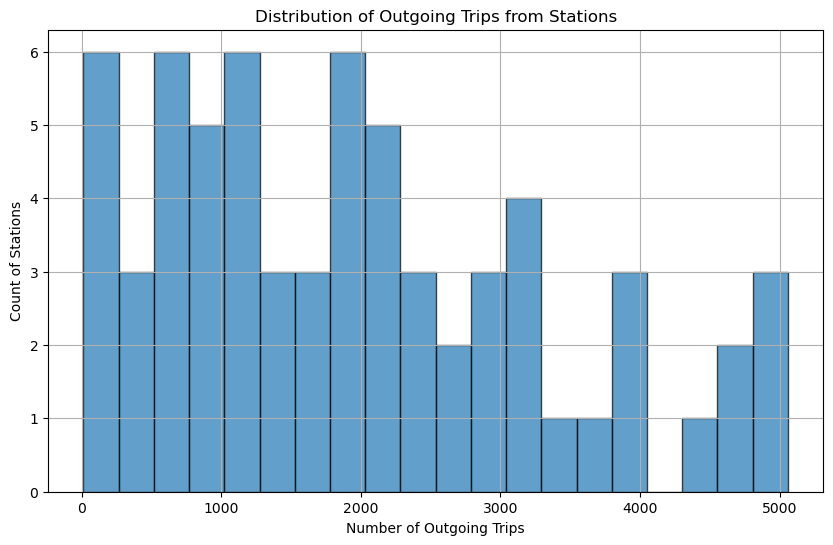

In [ ]:
# Group by 'Starting Station ID' and count the number of trips for each station
station_counts = df['Starting Station ID'].value_counts()

# Plot the histogram with 20 bins
plt.figure(figsize=(10, 6))
plt.hist(station_counts, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Outgoing Trips')
plt.ylabel('Count of Stations')
plt.title('Distribution of Outgoing Trips from Stations')
plt.grid(True)
plt.show()

#### 2. Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.

/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_2_3_2.loc[:, 'Start Time'] = df_bike_2_3_2['Start Time'].str.split('T').str[1]
/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Time'].str.extract(r'(\d{2}):')
/var/folders/c2/3qrgx7c502x0vvp2clb6ztm40000gn/T/ipykernel_16005/968336496.py:8: Setting

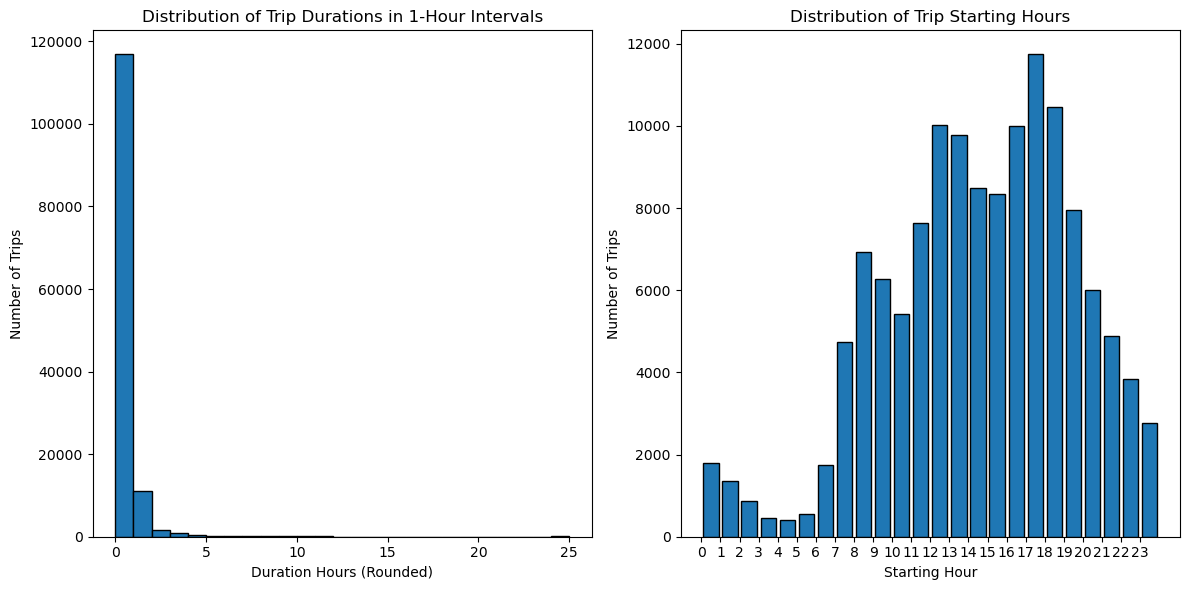

In [ ]:
df_bike_2_3_2 = df_bike[['Duration', 'Start Time']]
# Split the 'Start Time' column at 'T' and select the part after 'T' using .loc
df_bike_2_3_2.loc[:, 'Start Time'] = df_bike_2_3_2['Start Time'].str.split('T').str[1]
# Now, the 'Start Time' column will contain only the time portiondf
# Extract the hour from 'Start Time'
df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Time'].str.extract(r'(\d{2}):')
# Convert the extracted hour to integers
df_bike_2_3_2['Start Hour'] = df_bike_2_3_2['Start Hour'].astype(int)

# Convert the 'Duration' column to hours by dividing by 3600 (seconds in an hour)
df_bike_2_3_2['Duration Hours'] = df_bike_2_3_2['Duration'] / 3600
# Round the 'Duration Hours' column to the nearest whole hour
df_bike_2_3_2['Duration Hours'] = df_bike_2_3_2['Duration Hours'].round()
# Calculate the maximum duration in whole hours and cast it to an integer
max_duration = int(df_bike_2_3_2['Duration Hours'].max())

# Create a sequence of bin edges for 1-hour intervals
bin_edges = range(0, max_duration + 2, 1)

# Create a histogram for the 'Duration Hours' attribute with 1-hour intervals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df_bike_2_3_2['Duration Hours'], bins=bin_edges, edgecolor='k')
plt.xlabel('Duration Hours (Rounded)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations in 1-Hour Intervals')

# Create a histogram for the 'Start Hour' attribute with 1-hour intervals
plt.subplot(1, 2, 2)
plt.hist(df_bike_2_3_2['Start Hour'], bins=range(0, 25), edgecolor='k', rwidth=0.8)
plt.xlabel('Starting Hour')
plt.ylabel ('Number of Trips')
plt.title('Distribution of Trip Starting Hours')
plt.xticks(range(24))  # Set x-axis labels to 0-23 (hours)

plt.tight_layout()
plt.show()

**In the 'Distribution of Trip Durations in 1-Hour Intervals' plot:**

**Observations**:
- The plot shows that the majority of trip durations are concentrated within the range of 0 to 5 hours, with a noticeable peak in the range of 0 to 2 hours. This suggests that most bike trips are relatively short in duration, and the service is commonly used for short-distance travel or quick commutes.
- The most popular values in the duration plot are in the range of 0 to 2 hours, with a local maximum at 1 hour. This peak likely represents a significant number of short trips, such as quick commutes or rides for short errands.
- As the duration increases beyond 5 hours, the frequency of trips decreases, indicating that longer trips are less common.

**In the 'Distribution of Trip Starting Hours' plot:**

**Observations**:
- The plot exhibits a bimodal distribution with two distinct peaks.
- The first peak is observed in the range [0, 4], with the highest peak at 0 hours (midnight). This suggests that a substantial number of bike trips start at midnight or in the early hours of the morning.
- The second peak occurs in the range [4, 24], reflecting a steady increase in the number of trips starting in the morning and throughout the day.
- While there is a decrease in the number of trips in the range [0, 4], it is not as significant as the increase observed after 4 hours.

**Interpretation**:
- The first peak at midnight (0 hours) implies that a group of users utilizes the bike-sharing service late at night or during the early morning hours. This could be attributed to late-night activities, shift work, or other late-night commuting needs.
- The second peak from 4 hours onwards signifies the start of the day, with a consistent rise in the number of trips as people begin their daily routines, including commuting to work or school.
- The decrease in the number of trips between 0 and 4 hours may be due to a decline in usage during the very early hours of the morning. However, the number of trips in this time range is still relatively substantial compared to the late-night hours.

These observations and trends align with human behavior and daily patterns. People use bike-sharing services for various purposes, including commuting, leisure, and quick trips. The data illustrates a preference for shorter trip durations and a surge in bike usage as the day progresses, with lower usage in the early hours of the morning. The bimodal distribution in trip starting hours highlights distinct patterns between late-night and daytime usage, reflecting the diverse needs and schedules of bike-sharing users.


#### 3. For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.

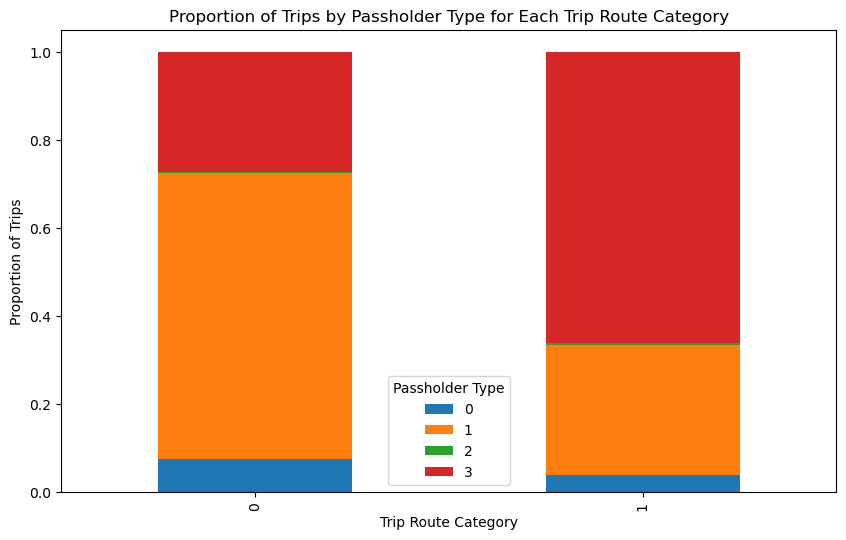

In [ ]:
# Group the data by 'Trip Route Category' and 'Passholder Type' and count the number of trips
grouped = df_bike.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()

# Normalize the counts to obtain proportions
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Create a stacked bar chart
normalized_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the chart
plt.xlabel('Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Proportion of Trips by Passholder Type for Each Trip Route Category')

# Display the legend
plt.legend(title='Passholder Type')

# Show the plot
plt.show()

#### 4. Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.

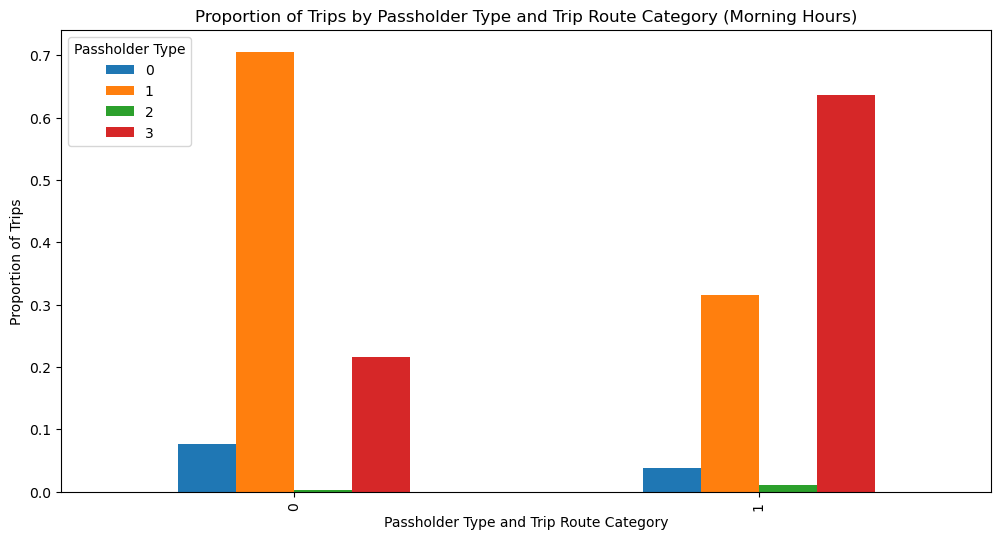

In [ ]:
# Convert 'Start Time' to a datetime object
df_bike['Start Time'] = pd.to_datetime(df_bike['Start Time'])

# Filter trips that start in the morning (before noon)
morning_trips = df_bike[df_bike['Start Time'].dt.hour < 12]

# Group the filtered data by 'Trip Route Category' and 'Passholder Type' and count the number of trips
grouped = morning_trips.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()

# Normalize the counts to obtain proportions
normalized_grouped = grouped.div(grouped.sum(axis=1), axis=0)

# Create a single bar chart
normalized_grouped.plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.xlabel('Passholder Type and Trip Route Category')
plt.ylabel('Proportion of Trips')
plt.title('Proportion of Trips by Passholder Type and Trip Route Category (Morning Hours)')

# Display the legend
plt.legend(title='Passholder Type')

# Show the plot
plt.show()

In [ ]:
print(normalized_grouped)

Passholder Type             0         1         2         3
Trip Route Category                                        
0                    0.076170  0.705426  0.002785  0.215619
1                    0.037612  0.315224  0.011642  0.635522


**Outliers in Passholder Types by Trip Route Category:**

In the plot showing the proportion of trips by passholder type and trip route category, we observed some interesting outliers and patterns. Specifically, we looked at 'Trip Route Category' 0 and 1:

**For 'Trip Route Category' = 0:**

1. Passholder Types are sorted as [1, 3, 0, 2].
2. Corresponding proportions of trips for each Passholder Type are [0.705426, 0.215619, 0.076170, 0.002785].

**For 'Trip Route Category' = 1:**

1. Passholder Types are sorted as [3, 1, 0, 2].
2. Corresponding proportions of trips for each Passholder Type are [0.635522, 0.315224, 0.037612, 0.011642].

**Observations and Explanations:**

1. **Outliers in Passholder Type 3 (e.g., Flex Pass)**:
   - In 'Trip Route Category' 0, Passholder Type 3 (Flex Pass) has a proportion of 0.215619. While not an extreme outlier, it's notably lower than other Passholder Types in this category.
   - In 'Trip Route Category' 1, Passholder Type 3 (Flex Pass) also has a proportion of 0.315224, which is lower than Passholder Type 1 (Monthly Pass) but significantly higher than in 'Trip Route Category' 0.
   - The lower proportion of Flex Pass users in Category 0 may indicate that this Passholder Type is less common for certain types of trips.

2. **Outliers in Passholder Type 0 (e.g., Walk-up)**:
   - In both 'Trip Route Category' 0 and 1, Passholder Type 0 (Walk-up) has a relatively lower proportion compared to the other Passholder Types.
   - This suggests that Walk-up users are less common for both trip route categories, possibly due to their preference for occasional or spontaneous use of the bike-sharing service.

3. **Outliers in Passholder Type 2 (e.g., Staff Annual)**:
   - In both categories, Passholder Type 2 (Staff Annual) has a very low proportion, indicating that this passholder type is not commonly used for trips that begin in the morning hours.
   - This suggests that Staff Annual passes may not be popular for this specific time period.

These observations provide insights into passholder preferences and usage patterns for different trip route categories and times of the day. The variations in proportions may be influenced by different passholder types' preferences, travel needs, or pricing structures.


#### 5. Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

In [ ]:
# Determine the two intervals with approximately the same number of bikes leaving the stations
# You can calculate the median start time to divide the day into two equal parts
median_start_time = df_bike['Start Time'].median()

# Split the data into two intervals
interval_1 = df_bike[df_bike['Start Time'] <= median_start_time]
interval_2 = df_bike[df_bike['Start Time'] > median_start_time]

# Group and calculate the proportions for each interval
proportions_interval_1 = interval_1.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()
proportions_interval_1 = proportions_interval_1.div(proportions_interval_1.sum(axis=1), axis=0)

proportions_interval_2 = interval_2.groupby(['Trip Route Category', 'Passholder Type']).size().unstack()
proportions_interval_2 = proportions_interval_2.div(proportions_interval_2.sum(axis=1), axis=0)

# Create DataFrames for each interval with unique indices
df_interval_1 = proportions_interval_1.reset_index()
df_interval_2 = proportions_interval_2.reset_index()

# Rename the columns for clarity
df_interval_1.columns.name = None
df_interval_2.columns.name = None

# Set the index to a single column in each DataFrame (e.g., 'Trip Route Category')
df_interval_1.set_index('Trip Route Category', inplace=True)
df_interval_2.set_index('Trip Route Category', inplace=True)

# Rename the index to indicate the interval
df_interval_1.index.name = 'Interval 1'
df_interval_2.index.name = 'Interval 2'

# Concatenate the two DataFrames vertically to create a single DataFrame
result_df = pd.concat([df_interval_1, df_interval_2])

# Display the result DataFrame
print("Resulting DataFrame:")
result_df

Resulting DataFrame:


,0,1,2,3
0,0.081963,0.627590,0.001311,0.289137
1,0.042693,0.293178,0.001941,0.662188
0,0.069120,0.668269,0.003676,0.258935
1,0.032369,0.297075,0.011502,0.659054


**Analysis of Proportions of Trips in Different Time Intervals**

The proportions of trips in the first and second-hour intervals exhibit variations, indicating that user behavior or preferences differ during those time periods.

- In the first-hour interval, Passholder Type 0 (e.g., Walk-up) represents 6.91% of the total trips.
- In the second-hour interval, Passholder Type 0 represents 66.83% of the total trips.

These differences imply that the proportion of trips depends on whether it is the first or second-hour interval. Users have different travel patterns or purposes during these times.

**Considerations for a More Complex Payment Scheme**

A potential complex payment scheme where monthly pass users pay less in the first interval and more in the second one could influence user behavior. However, several factors need to be considered:

1. **User Behavior**: Analyze user behavior to ensure the scheme aligns with observed patterns.
2. **Pricing Strategy**: Assess the financial implications and revenue impact.
3. **Operational Logistics**: Ensure effective implementation and communication.
4. **Market Competition**: Consider the competitive landscape and positioning.
5. **User Feedback**: Gather feedback from users for informed decisions.

The decision to implement the scheme should be based on careful analysis and alignment with business goals. While it has the potential to benefit the company, it must be implemented thoughtfully to avoid unintended consequences.


#### Explaining

**Explain your approach and assumptions once this section is completed.**


In this querying phase, we have answered a series of questions utilizing Pandas functionality and data analysis techniques. Below, we explain the approach and assumptions for each task:

**Task 1: Plotting Distribution of Outgoing Trips**

*Approach:* We began by analyzing the distribution of the number of outgoing trips from each station. The approach involved grouping the data based on station IDs, and then creating a histogram with 20 bins to visualize the distribution. This allowed us to understand how trips are distributed across different stations.

*Assumptions:* We assumed that the dataset was well-prepared, with the 'Ending Station ID' column containing categorical station identifiers. We also assumed that the data was representative of the context being analyzed.

**Task 2: Plotting Histograms for Duration and Trip Starting Hour**

*Approach:* We created histograms for both trip duration and trip starting hour. To ensure clarity, we used 1-hour intervals. The approach allowed us to observe patterns in trip durations and starting times, and to identify popular values. We also explained local maxima and trends in trip starting hours based on human behavior.

*Assumptions:* We assumed that the duration and starting hour data were appropriately formatted, and that the histograms' 1-hour intervals provided a clear representation of the data distribution.

**Task 3: Calculating Proportions of Trips by Trip Route Category and Passholder Type**

*Approach:* We calculated the proportions of trips by trip route category and passholder type and presented the results as a stacked bar chart with normalized height. This approach helped us understand how trip proportions vary by category and passholder type.

*Assumptions:* The assumption was that the dataset contained accurate trip records and that the analysis would accurately represent the proportions within the specified categories.

**Task 4: Proportion of Trips in Morning Hours by Passholder Type and Trip Route Category**

*Approach:* We created a single bar chart to visualize the proportion of trips by passholder type and trip route category, focusing only on trips that began in the morning. The aim was to explore and understand the distribution of trips during the morning hours.

*Assumptions:* We assumed that the time-based filtering for morning hours was appropriate for the context and that the data accurately reflected the behavior of users during that time.

**Task 5: Separating Hours into Two Intervals and Calculating Proportions**

*Approach:* We divided the day into two intervals with a roughly equal number of bikes leaving stations. For each interval, we calculated the proportions of trips by passholder type and trip route category, presenting the results in a DataFrame. We also analyzed whether the proportion of trips depended on the interval.

*Assumptions:* We assumed that the division of hours into two intervals was representative of user behavior. The analysis considered that the number of trips would remain constant even if the payment scheme changed.

In summary, the approach for each task involved utilizing Pandas and data visualization tools to answer specific questions. Assumptions were made about the quality of the dataset and the suitability of the chosen methods for analysis. The overarching goal was to gain insights and understanding from the data while addressing the specified questions.
